In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [15]:
data = pd.read_csv('Rutherford.csv', delimiter=';', decimal=',')
# print(data)
data = data.query("Counts>0")
data

,Folie,Dicke [um],Messzeit [min],Winkel [deg],Counts,Rate [1/s]
4,Gold,2,5,30,12.0,0.040000
18,Gold,2,5,15,128.0,0.426667
19,Gold,2,5,20,44.0,0.146667
20,Gold,2,5,25,8.0,0.026667
21,Gold,2,5,30,6.0,0.020000
22,Gold,2,10,35,10.0,0.016667
23,Gold,2,10,40,5.0,0.008333
24,Gold,2,10,45,3.0,0.005000
25,Gold,2,10,50,1.0,0.001667
26,Gold,2,10,55,3.0,0.005000


### a)

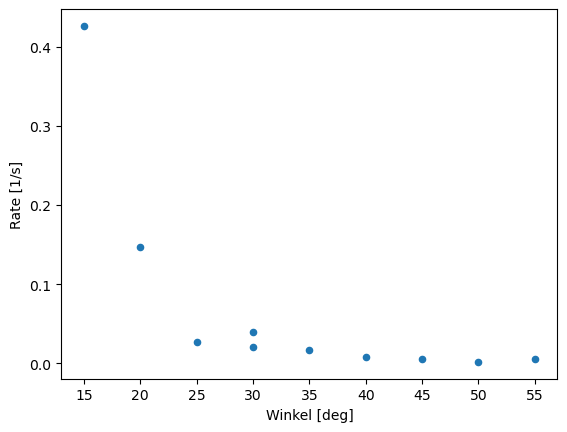

In [3]:
data.plot.scatter(x="Winkel [deg]", y="Rate [1/s]")
plt.savefig("1.svg")

### b)

In [5]:
theta, rate = np.array(data.get(["Winkel [deg]", "Rate [1/s]"])).T
f = lambda theta, a, b: a * np.sin(theta * 2*np.pi/360 /2)**b
fit, _ = curve_fit(f, theta, rate)

### c)

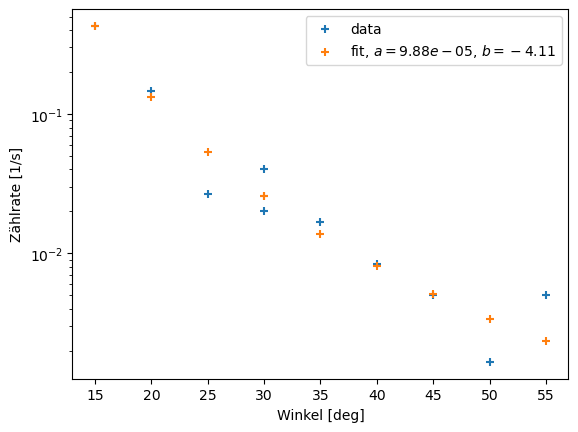

In [16]:
plt.scatter(theta,rate, label="data", marker="+")
plt.scatter(theta,f(theta, *fit), label=f"fit, $a={fit[0]:.3}$, $b={fit[1]:.3}$", marker="+")
plt.legend()
plt.yscale("log")
plt.xlabel("Winkel [deg]")
plt.ylabel("Zählrate [1/s]")
plt.savefig("2.svg")

# Theoretisch ist b=-4 zu erwarten -> relative Abweichung: ~2.75 % 